<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-required-libraries---2-Marks" data-toc-modified-id="Import-required-libraries---2-Marks-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import required libraries - 2 Marks</a></span></li><li><span><a href="#Read-dataset-and-perfom-Text-processing-for-the-tweets-(-Remove-Stop-words-,-special-characters-and-convert-the-text-to-lowercase-)---3-Mark" data-toc-modified-id="Read-dataset-and-perfom-Text-processing-for-the-tweets-(-Remove-Stop-words-,-special-characters-and-convert-the-text-to-lowercase-)---3-Mark-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read dataset and perfom Text processing for the tweets ( Remove Stop words , special characters and convert the text to lowercase ) - 3 Mark</a></span></li><li><span><a href="#Using-the-train_test_split-function-of-Sklearn,-Split-train-and-test-dataset---1-Mark" data-toc-modified-id="Using-the-train_test_split-function-of-Sklearn,-Split-train-and-test-dataset---1-Mark-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Using the train_test_split function of Sklearn, Split train and test dataset - 1 Mark</a></span></li><li><span><a href="#Create-pipeline-and-define-parameters-for-GridSearch---1-Mark" data-toc-modified-id="Create-pipeline-and-define-parameters-for-GridSearch---1-Mark-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create pipeline and define parameters for GridSearch - 1 Mark</a></span></li><li><span><a href="#Perform-classification-(using-GridSearch)---3-Mark" data-toc-modified-id="Perform-classification-(using-GridSearch)---3-Mark-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Perform classification (using GridSearch) - 3 Mark</a></span></li><li><span><a href="#Print-the-confusion-matrix,-accuracy,-F1-score-on-the-test-dataset---2-Mark" data-toc-modified-id="Print-the-confusion-matrix,-accuracy,-F1-score-on-the-test-dataset---2-Mark-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Print the confusion matrix, accuracy, F1 score on the test dataset - 2 Mark</a></span></li><li><span><a href="#References" data-toc-modified-id="References-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>References</a></span></li><li><span><a href="#Assignment-Information---Sentiment-Analysis-Using-Naive-Bayes" data-toc-modified-id="Assignment-Information---Sentiment-Analysis-Using-Naive-Bayes-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Assignment Information - Sentiment Analysis Using Naive Bayes</a></span></li><li><span><a href="#Student-Information" data-toc-modified-id="Student-Information-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Student Information</a></span></li></ul></div>

# Import required libraries - 2 Marks

In [1]:
import nltk
import pandas as pd
import re
import seaborn as sns
import string

from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import ComplementNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

# Read dataset and perfom Text processing for the tweets ( Remove Stop words , special characters and convert the text to lowercase ) - 3 Mark

In [2]:
# Let's read the input dataset/text
df = pd.read_csv("Corona_NLP_train.csv")

In [3]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
# We are interested only in the OriginalTweet and Sentiment columns
# so, just retain only them
df = df [ [ "OriginalTweet", "Sentiment"] ]

In [5]:
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
df.shape

(41157, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB


In [8]:
# inspect the sentiment column to see how many unique values are there
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

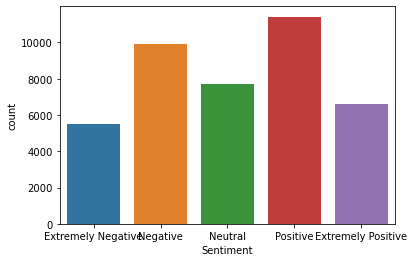

In [9]:
# We see 5 unique values for the sentiments
# Let's see how the distribution of these sentiments in the data
sns.countplot(x='Sentiment', data=df, order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'] )

In [10]:
# let's convert the Sentiment column into a numerical value, rather than object
df['Sentiment'].replace(['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'],[1, 2, 3, 4, 5], inplace=True)

In [11]:
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,3
1,advice Talk to your neighbours family to excha...,4
2,Coronavirus Australia: Woolworths to give elde...,4
3,My food stock is not the only one which is emp...,4
4,"Me, ready to go at supermarket during the #COV...",1


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

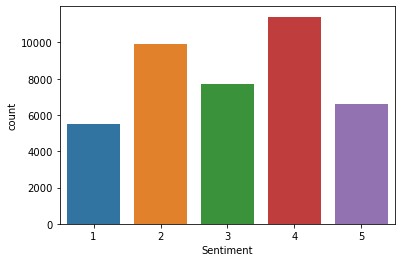

In [12]:
# Check after encoding, if the same distributions are maintained
sns.countplot(x='Sentiment', data=df, order=[1, 2, 3, 4, 5] )

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 643.2+ KB


In [14]:
# This method removes stop words, special characters and converts to lower case
# also as the input text is a tweet, a lot more items are cleaned-up like:
# URLs, hashtags etc
def preprocess_text(text):
    stoppunc = stopwords.words('english')
    stoppunc += string.punctuation
    text = text.lower()
    text = ' '.join([w for w in word_tokenize(text) if ( w not in stoppunc and w.isalpha() == True )])
    text = re.sub('^@[\w\d]{4,15}','', text) # remove twitter user name
    text = re.sub('@[^\s]+','', text) # remove twitter user name, in case @ is followed by a space
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE) # remove URLs
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','', text) 
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text) # remove words like a1123 etc
    text = re.sub(' +',' ', text) # remove + sign
    text = re.sub(r'(.)\1{2,}', r'\1', text) # remove same characters appearing >2 times continuously
    text = re.sub('#[\w\d]+','',text) # remove hashtags
    text = re.sub(r'[^a-zA-Z0-9\s]','', text, re.I) # remove anything EXCEPT letters and numbers or whitespaces
    text = re.sub(r'\b[a-zA-Z]\b', '', text, re.I) # removes single letters like ' a ' ' b ' surrounded by spaces
    text = re.sub(r'\b\d*\b', '', text) # remove any number surrounded by word boundaries and removes them.
    text = re.sub(r'\b\d.*\b', '', text) # remove words starting in a number, and removes them. There is a LOT of junk like 2n, 2r, 3bc, 3d7, stuff like that.
    text = re.sub(r'\b[a-zA-Z]\d*\b', '', text) # remove words like a12334 and a11111111, b24 etc
    text = re.sub('https', '', text) # remove https 
    text = re.sub('http', '', text) # remove http
    return text.strip()

In [15]:
# apply the method to pre-process the text
df['OriginalTweet'] = df['OriginalTweet'].apply(preprocess_text).to_frame()

In [16]:
# after pre-processing, if there are blank lines, remove them
df = df[df.OriginalTweet != ''] # remove blank lines 

In [17]:
# inspect the final cleaned-up text
df

,OriginalTweet,Sentiment
0,menyrbie chrisitv,3
1,advice talk neighbours family exchange phone n...,4
2,coronavirus australia woolworths give elderly ...,4
3,food stock one empty please panic enough food ...,4
4,ready go supermarket outbreak paranoid food st...,1
...,...,...
41152,airline pilots offering stock supermarket shel...,3
41153,response complaint provided citing related del...,1
41154,know getting tough kameronwilds rationing toil...,4
41155,wrong smell hand sanitizer starting turn coron...,3


In [18]:
#df.to_csv('tweet.csv')

# Using the train_test_split function of Sklearn, Split train and test dataset - 1 Mark

In [19]:
# Input feature
x = df['OriginalTweet']

# Target feature
y = df['Sentiment']

# Split the training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Create pipeline and define parameters for GridSearch - 1 Mark

In [20]:
# let's experiment with a few classifiers, to see which one classifies better
# We will create a list of tuples containing the (pipeline, classifier parameters) that we are interested in
pipe_params = [ 

    (
        Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', ComplementNB())])
        ,
        {
            'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
            'tfidf__use_idf': (True, False),
            'tfidf__norm': ('l1','l2'),
            'clf__alpha': [1, 1e-1, 1e-2]
        }
    ),

    (
        Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=5, tol=None))])
        ,
        {
            'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
            'tfidf__use_idf': (True, False),
            'tfidf__norm': ('l1','l2'),
            'clf__alpha': [1, 1e-1, 1e-2]
        }
    ),

    (
        Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC())])
        ,
        {
            'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
            'tfidf__use_idf': (True, False),
            'tfidf__norm': ('l1','l2')
        }
    ),

    (
        Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])
        ,
        {
            'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
            'tfidf__use_idf': (True, False),
            'tfidf__norm': ('l1','l2'),
            'clf__fit_prior': [True, False],
            'clf__alpha': [1, 1e-1, 1e-2]
        }
    )
    
]

# Perform classification (using GridSearch) - 3 Mark

In [21]:
# for each classifier in the list, lets perform classification using GridSearchCV for all parameters
# will save the best classifer givinig the best clf.best_score_

best_of_best_score = 0

for pipeline, parameter in pipe_params:
    print('\nStarting GridSearch for', pipeline[2])
    clf = GridSearchCV(pipeline, parameter, cv=5, verbose=10, n_jobs=-1) # max parallel processors
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)

    print("\nAlgorithm is: ", pipeline[2])
    print("The best score obtained is: ", f"{100*clf.best_score_:.2f}%")
    print("The best score is obtained with parameters : ", clf.best_params_)    
    
    if ( clf.best_score_ > best_of_best_score ):
        best_algorithm = pipeline[2]
        best_of_best_score = clf.best_score_
        best_of_best_params = clf.best_params_
        best_x_test = x_test
        best_y_test = y_test
        best_y_predict = y_predict
        best_clf = clf


Starting GridSearch for ComplementNB()
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Algorithm is:  ComplementNB()
The best score obtained is:  48.10%
The best score is obtained with parameters :  {'clf__alpha': 1, 'tfidf__norm': 'l2', 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}

Starting GridSearch for SGDClassifier(alpha=0.001, max_iter=5, random_state=42, tol=None)
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Algorithm is:  SGDClassifier(alpha=0.001, max_iter=5, random_state=42, tol=None)
The best score obtained is:  52.86%
The best score is obtained with parameters :  {'clf__alpha': 0.01, 'tfidf__norm': 'l2', 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}

Starting GridSearch for LinearSVC()
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Algorithm is:  LinearSVC()
The best score obtained is:  55.81%
The best score is obtained with parameters :  {'tfidf__norm': 'l2', 'tfidf__use_idf': False, 'vect__ngram_range': (1, 

# Print the confusion matrix, accuracy, F1 score on the test dataset - 2 Mark


The best algorithm is:  LinearSVC()

 ---------- Confusion Matrix ---------- 

[[ 685  310   41   52    8]
 [ 327  967  278  358   53]
 [  15  186 1100  212   25]
 [  49  336  302 1180  418]
 [   8   47   26  382  862]]

 ---------- Confusion Matrix (Graphical) ---------- 



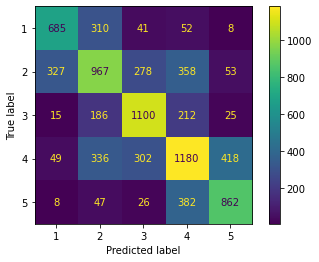


 ---------- Accuracy Score ---------- 

58.27%

 ---------- F1 Score ---------- 

58.05%


In [22]:
# display accuracy score metric for the best of the best classifier 
print("\nThe best algorithm is: ", best_algorithm)
print("\n ---------- Confusion Matrix ---------- \n")
print(confusion_matrix(best_y_test, best_y_predict))

print("\n ---------- Confusion Matrix (Graphical) ---------- \n")
plot_confusion_matrix(best_clf, best_x_test, best_y_test)
plt.show()

print("\n ---------- Accuracy Score ---------- \n")
print(f"{100*accuracy_score(best_y_test, best_y_predict):.2f}%")

print("\n ---------- F1 Score ---------- \n")
print(f"{100*f1_score(best_y_test, best_y_predict, average='weighted'):.2f}%")

# References

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://towardsdatascience.com/sentiment-analysis-of-tweets-using-multinomial-naive-bayes-1009ed24276b

https://towardsdatascience.com/ml-pipelines-with-grid-search-in-scikit-learn-2539d6b53cfb

https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

https://www.programcreek.com/python/example/83254/sklearn.feature_extraction.text.TfidfVectorizer

https://python.hotexamples.com/examples/sklearn.model_selection/GridSearchCV/-/python-gridsearchcv-class-examples.html

# Assignment Information - Sentiment Analysis Using Naive Bayes

https://bits-pilani.instructure.com/courses/972/assignments/4513

# Student Information

In [23]:
#!pip install termcolor
#!pip install colorama
#!pip install pyfiglet

import pyfiglet
import winsound
from termcolor import colored

In [24]:
print(colored(pyfiglet.figlet_format('T L Sudheendran '+ '2020AIML003'),'white', 'on_green' ))
winsound.MessageBeep()

 _____   _       ____            _ _                         _                 
|_   _| | |     / ___| _   _  __| | |__   ___  ___ _ __   __| |_ __ __ _ _ __  
  | |   | |     \___ \| | | |/ _` | '_ \ / _ \/ _ \ '_ \ / _` | '__/ _` | '_ \ 
  | |   | |___   ___) | |_| | (_| | | | |  __/  __/ | | | (_| | | | (_| | | | |
  |_|   |_____| |____/ \__,_|\__,_|_| |_|\___|\___|_| |_|\__,_|_|  \__,_|_| |_|
                                                                               
 ____   ___ ____   ___    _    ___ __  __ _     ___   ___ _____ 
|___ \ / _ \___ \ / _ \  / \  |_ _|  \/  | |   / _ \ / _ \___ / 
  __) | | | |__) | | | |/ _ \  | || |\/| | |  | | | | | | ||_ \ 
 / __/| |_| / __/| |_| / ___ \ | || |  | | |__| |_| | |_| |__) |
|_____|\___/_____|\___/_/   \_\___|_|  |_|_____\___/ \___/____/ 
                                                                

